In [1]:
import os,sys
sys.path.append('../../sandbox')
import matplotlib.pyplot as plt
import numpy as np
from time import sleep

#import sandbox as sb
import sandbox_new as sbn

In [2]:
%%capture
box = sbn.Sandbox(calibration_file='calibration.json')

In [3]:
# display calibration standard values
box.calibration.__dict__

{'p_width': 800,
 'p_height': 600,
 'p_dpi': 100,
 'p_top_margin': 20,
 'p_left_margin': 20,
 'p_area_width': 604,
 'p_area_height': 412,
 'p_area_depth': 200,
 's_width': 512,
 's_heigth': 424}

In [5]:
%%capture
box.projector.update()

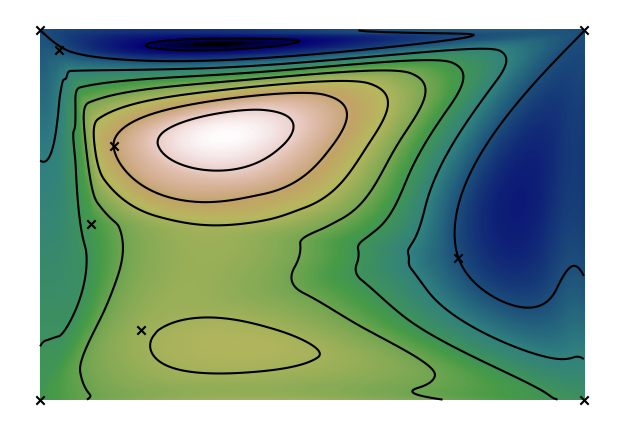

In [7]:

box.projector.keep_updating()

In [27]:
#box.projector.output.object.savefig('test2.png', facecolor=box.projector.mpl_pane.object.get_facecolor())

In [8]:
# use projector calibration inside the projector class and live update values in calibration object
box.projector.calibrate_projector()

Column
    [0] Markdown(str)
    [1] IntSlider(end=150, name='Top margin', start=20)
    [2] IntSlider(end=150, name='Left margin', start=20)
    [3] IntSlider(end=1004, name='Map width', start=204, value=604)
    [4] IntSlider(end=812, name='Map height', start=12, value=412)

In [7]:
# check calibration class values
box.calibration.__dict__

{'p_width': 800,
 'p_height': 600,
 'p_dpi': 100,
 'p_top_margin': 20,
 'p_left_margin': 20,
 'p_area_width': 604,
 'p_area_height': 412,
 'p_area_depth': 200,
 's_width': 512,
 's_heigth': 424}

In [8]:
# export calibration
box.calibration.save_json('calibration.json')

JSON configuration file saved: calibration.json
